## Setup

In [2]:
import soundfile as sf

In [3]:
import librosa
import numpy as np
import IPython.display as ipd
# ipd.Audio('audio/conga_groove.wav') # load a local WAV file
# ipd.Audio(x, rate=sr) # load a NumPy array
import matplotlib
import matplotlib.pylab as plt
from matplotlib import cm

In [7]:
def spectrogram(x,STFT=False) : 
    #print(np.shape(x))
    eps = 1e-13
    if STFT : 
        pass
    else :
        x = librosa.stft(x,window='hann', n_fft=1024, hop_length=256 , win_length=None ,center=True)
    # dB scale
    tmp =(np.abs(x[:,:]))
    tmp = np.clip(tmp,a_min=eps,a_max=None)
    tmp = 10*np.log10(tmp)
    tmp = tmp[::-1,:]

    im = plt.imshow(tmp, cmap=cm.jet, aspect='auto')
    plt.colorbar(im)
    plt.clim(-80,20)
    plt.show()

In [ ]:
ipd.display(ipd.Markdown('## clean'))
#ipd.display(ipd.Audio(clean, rate=sr))

spectrogram(clean)
aug_clean = biquad_filter(clean)


ipd.display(ipd.Markdown('## aug_clean'))
#ipd.display(ipd.Audio(aug_clean, rate=sr))
spectrogram(aug_clean)
print('np.sum(np.abs(clean-aug_clean)) : ' + str(np.sum(np.abs(clean-aug_clean))))

In [ ]:
ipd.display(ipd.Audio(clean, rate=sr))

## Loading data

(78333,)
(73344,)


## clean

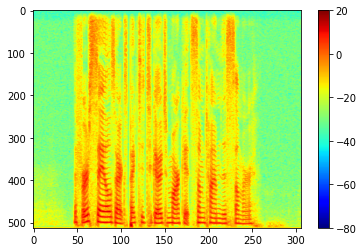

## noisy

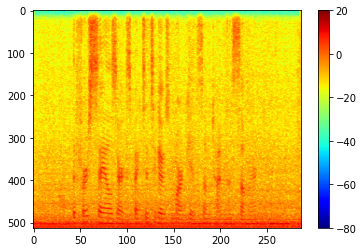

In [8]:
clean, _ = librosa.load("clean.wav",sr=16000)
noisy, _ = librosa.load("noisy.wav",sr=16000)
print(np.shape(clean))
print(np.shape(noisy))

ipd.display(ipd.Markdown('## clean'))
spectrogram(clean)
ipd.display(ipd.Markdown('## noisy'))
spectrogram(noisy)

## Massing with Phase

In [13]:
stft_clean = librosa.stft(clean,window='hann', n_fft=1024, hop_length=256 , win_length=None ,center=True)
stft_noisy = librosa.stft(noisy,window='hann', n_fft=1024, hop_length=256 , win_length=None ,center=True)
print(np.shape(stft_clean))
print(np.shape(stft_noisy))

mag_clean,phase_clean = librosa.magphase(stft_clean)
mag_noisy,phase_noisy = librosa.magphase(stft_noisy)

print(np.shape(mag_clean))
print(np.shape(phase_clean))
print(np.shape(mag_noisy))
print(np.shape(phase_noisy))

(513, 306)
(513, 287)
(513, 306)
(513, 306)
(513, 287)
(513, 287)


In [21]:
print(np.max(phase_clean))
print(np.min(phase_clean))
print(phase_clean)

(1+0.00023112577j)
(-1-0.00023928483j)
[[-1.        -8.7422777e-08j -1.        -8.7422777e-08j
  -1.        -8.7422777e-08j ... -1.        -8.7422777e-08j
  -1.        -8.7422777e-08j -1.        -8.7422777e-08j]
 [ 1.        +5.3194099e-17j  0.99847937-5.5126462e-02j
   0.9999803 +6.2838616e-03j ...  0.99999803+1.9801746e-03j
   0.99999976+6.6711771e-04j  0.99939936+3.4654904e-02j]
 [ 1.        +5.0132423e-17j -0.9898258 -1.4228450e-01j
   0.92113924+3.8923320e-01j ...  0.98097634+1.9412744e-01j
  -0.99421334-1.0742367e-01j -0.18816452+9.8213750e-01j]
 ...
 [-1.        -8.7422777e-08j  0.9908403 +1.3503875e-01j
   0.97789186-2.0911133e-01j ... -0.876435  +4.8152018e-01j
   0.99005485-1.4068195e-01j -0.99665767-8.1691355e-02j]
 [ 1.        -1.6536848e-15j -0.57190543-8.2031953e-01j
  -0.99170935+1.2850098e-01j ...  0.55291414-8.3323824e-01j
  -0.94571906+3.2498530e-01j  0.84725434+5.3118747e-01j]
 [-1.        -8.7422777e-08j  1.        +0.0000000e+00j
   1.        +0.0000000e+00j ... -1

## zero phase

In [17]:
zero_clean = np.zeros(np.shape(phase_clean))
zero_noisy = np.zeros(np.shape(phase_noisy))

stft_t1_clean = mag_clean * np.exp(zero_clean*1j)
stft_t1_noisy = mag_noisy * np.exp(zero_noisy*1j)

t1_clean = librosa.istft(stft_t1_clean)
t1_noisy = librosa.istft(stft_t1_noisy)

ipd.display(ipd.Markdown('## t1_clean'))
ipd.display(ipd.Audio(t1_clean, rate=16000))
ipd.display(ipd.Markdown('## t1_noisy'))
ipd.display(ipd.Audio(t1_noisy, rate=16000))

## t1_clean

## t1_noisy

딥러닝시 음성이 뭉게지는건 phase 때문이구나

## random phase

In [42]:
np.shape(phase_clean)[0],2

(513, 2)

In [45]:
crand_clean = np.random.randn(np.shape(phase_clean)[0],np.shape(phase_clean)[1],2).view(np.complex128)
crand_noisy = np.random.randn(np.shape(phase_noisy)[0],np.shape(phase_noisy)[1],2).view(np.complex128)

stft_t2_clean = mag_clean * np.exp(crand_clean[:,:,0]*1j)
stft_t2_noisy = mag_noisy * np.exp(crand_noisy[:,:,0]*1j)

t2_clean = librosa.istft(stft_t2_clean)
t2_noisy = librosa.istft(stft_t2_noisy)

ipd.display(ipd.Markdown('## t2_clean'))
ipd.display(ipd.Audio(t2_clean, rate=16000))
ipd.display(ipd.Markdown('## t2_noisy'))
ipd.display(ipd.Audio(t2_noisy, rate=16000))

## t2_clean

## t2_noisy

In [35]:
np.random.randn(3)

array([-0.35950799,  1.44998493, -1.78243254])